<a href="https://colab.research.google.com/github/sujith22-hub/-OIBSIP_Fraud-Detection/blob/main/Wine_Quality_Prediction_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.80      0.76        96
           6       0.68      0.67      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.68      0.70      0.69       229

Classification Report for SGDClassifier:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.46      0.98      0.63        96
           6       0.56      0.05      0.09        99
           7       0.38      0.23      0.29        26
           8       0.00      0.00      0.00         2

    accuracy                           0.46       229
   macro avg       0.28      0.25      0

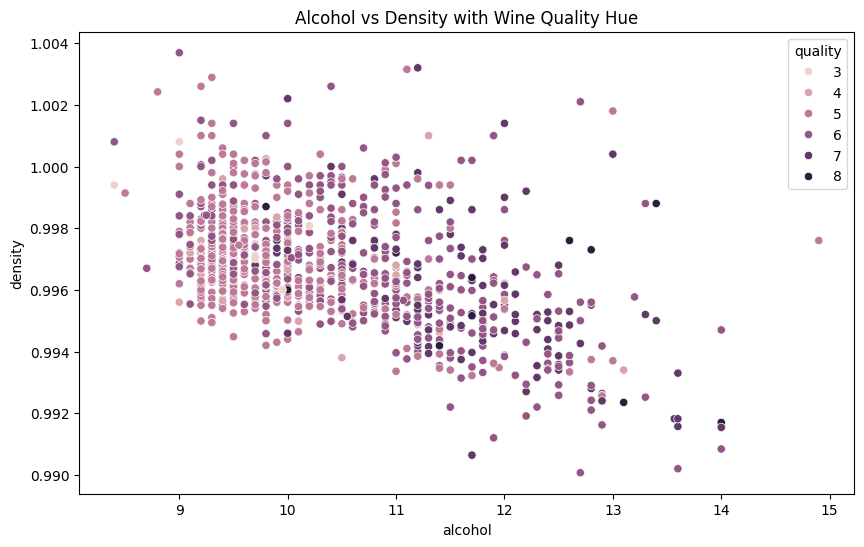

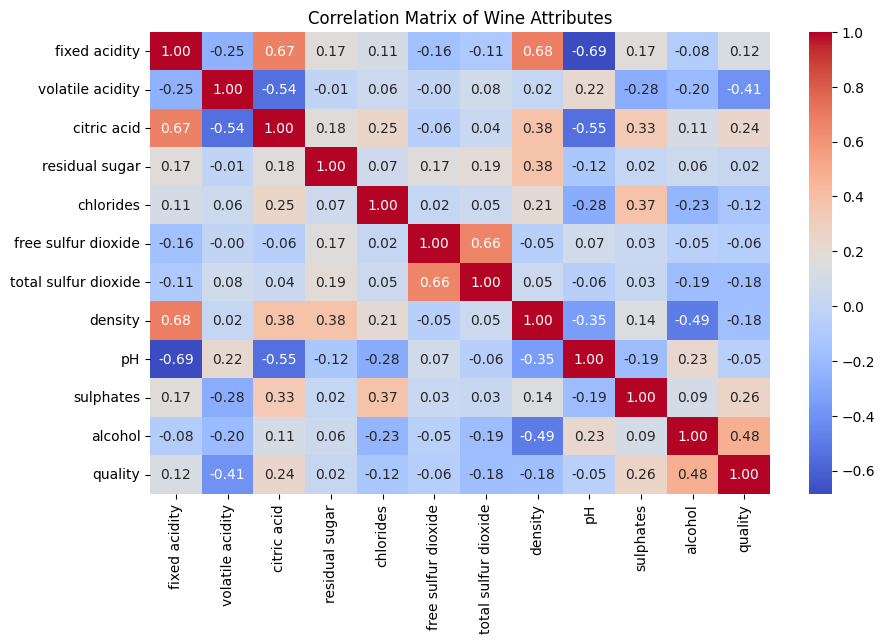

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

df = pd.read_csv('wine_quality.csv')

X = df.drop(['quality', 'Id'], axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'SGDClassifier': SGDClassifier(random_state=42),
    'SVC': SVC(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Classification Report for {name}:')
    print(classification_report(y_test, y_pred, zero_division=0))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='density', hue='quality', data=df)
plt.title('Alcohol vs Density with Wine Quality Hue')
plt.show()

plt.figure(figsize=(10, 6))
correlation_matrix = df.drop('Id', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Wine Attributes')
plt.show()